# Results of the pipeline

919


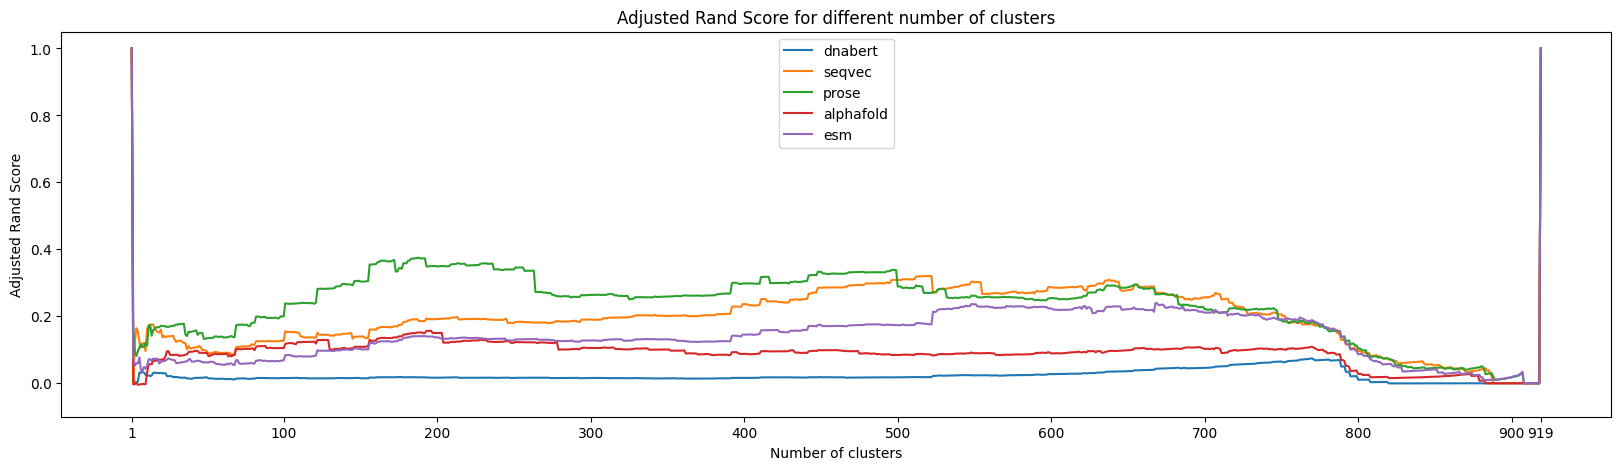

dnabert    seqvec     prose  alphafold       esm
combiner dimensional PCA                                                   
pca      10               0.046238  0.160063  0.298536   0.073903  0.100695
         50               0.046000  0.252097  0.308943   0.110252  0.150132
         all              0.045731  0.290935  0.309750   0.110292  0.175133
average  10               0.015080  0.149086  0.275995   0.075850  0.106070
         50               0.017410  0.216419  0.255307   0.106594  0.171478
         all              0.015012  0.246862  0.255316   0.105297  0.189549
sum      10               0.044273  0.145227  0.290672   0.121135  0.119793
         50               0.041539  0.197937  0.309053   0.121485  0.142253
         all              0.041029  0.204305  0.309053   0.123699  0.175153
max      10               0.014533  0.108017  0.293330   0.069774  0.142290
         50               0.015244  0.143204  0.340129   0.098664  0.204779
         all              0.017294  0.130760  0.319653   0.110832  0.225007

In [3]:
import pickle
from autoembedding.results_manager import results2table
import matplotlib.pyplot as plt
import numpy as np

PATH = '/storagenfs/m.tolloso/BioEmbedding/results/enrichment_results_mouse.pkl'

results = pickle.load(open(PATH, "rb"))
r, best_lst, results_dict_ars = results2table(
    results, 
    embedders= [
        "dnabert", 
        "seqvec", 
        "prose", 
        "alphafold", 
        "esm"
        ],
    combiners = ["pca", "average", "sum", "max"],
    pcas = [ '10', '50', 'all'],
    metric="mean_adjusted_rand_score", 
    
    preferred_metric_embedding="euclidean", 
    preferred_method_embedding="ward", 
    
    preferred_metric_gt="euclidean", # euclidean, average: equivalent to UPGMA when the gt is the distance matrix
    preferred_method_gt="average",
    
    preferred_edge_weight="jaccard",
    preferred_annotation="keywords"
)
# r.to_latex("./latex_output.tex")

fix, _ = plt.subplots(figsize=(20, 5))

plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score for different number of clusters")

plt.ylim(-0.1, 1.05)

X = [i for i in range(len(best_lst), 0, -1)]
print(len(best_lst))

plt.xticks([i for i in range(0, len(best_lst)+1, 100)][1:] + [1] + [len(best_lst)])

plt.plot(X, results_dict_ars['pca']['10']['dnabert'], label='dnabert')
plt.plot(X, results_dict_ars['pca']['all']['seqvec'], label='seqvec')
plt.plot(X, results_dict_ars['max']['50']['prose'], label='prose')
plt.plot(X, results_dict_ars['sum']['all']['alphafold'], label='alphafold')
plt.plot(X, results_dict_ars['max']['all']['esm'], label='esm')
plt.legend()
plt.show()
r
# plt.savefig(Path(PATH).stem + '.eps')
